In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import BallTree
import numpy as np
import folium
from folium import plugins
from folium.plugins import HeatMap
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from shapely.geometry import Point
import geopandas as gpd


In [79]:
df_main = pd.read_csv('../Final3/df_mainlast.csv') 
df_main.head()

,name,lat,long,url,rating,comment,sal1,sal2,id_open_close_main,id_customer_main,...,distance_rangsit,distance_khlong_rangsit,distance_lak_hok,distance_rmutt,distance_nbu,distance_bu,distance_tu,distance_rsu,weighted_rating,amazon
0,Cafe’ Amazon RM2076,13.992462,100.648220,https://www.google.com/maps/place/Cafe%E2%80%9...,4.2,115,฿1-100 ต่อคน,7.0,oc_500,ci_500,...,5.750316,5.526942,6.700225,4.288353,2.545516,6.479161,9.992976,7.601018,NaN,1
1,ร้านกาแฟ อเมซอน,13.989384,100.634434,https://www.google.com/maps/place/%E0%B8%A3%E0...,4.4,103,฿1-100 ต่อคน,7.0,oc_501,ci_501,...,4.259964,4.000615,5.225716,2.859694,4.071846,6.043252,9.726211,6.097600,NaN,1
2,Café Amazon สาขา โครงการรังสิตสเตชั่น (สำนักงา...,14.007563,100.614831,https://www.google.com/maps/place/Caf%C3%A9+Am...,3.5,13,฿100-200 ต่อคน,5.0,oc_502,ci_502,...,2.868412,3.431994,5.222182,3.800549,6.185930,3.559212,7.263149,5.678762,NaN,1
3,CAFÉ AMAZON รังสิต 200 ปี ซอย 4,13.989060,100.606208,https://www.google.com/maps/place/CAF%C3%89+AM...,4.3,12,฿1-100 ต่อคน,5.0,oc_503,ci_503,...,1.222328,1.220953,2.970249,1.918096,7.078128,5.654628,9.252708,3.516978,NaN,1
4,Café Amazon สาขาม.รังสิต,13.970512,100.630860,https://www.google.com/maps/place/Caf%C3%A9+Am...,3.5,6,NaN,NaN,oc_504,ci_504,...,4.460949,3.704490,4.173142,1.882750,5.291262,7.916160,11.637719,5.196244,NaN,1


In [102]:
# List ของมหาวิทยาลัย
universities = [
    ("RMUTT", 13.9734028, 100.6136685),
    ("North Bangkok", 13.9975329, 100.6712262),
    ("Bangkok University", 14.0395107, 100.6127897),
    ("Thammasat (TU)", 14.0722696, 100.6056305),
    ("RSU", 13.9670095, 100.582841)
]

# สร้าง DataFrame
df_unis = pd.DataFrame(universities, columns=['name', 'lat', 'long'])

In [80]:
# 1. คำนวณค่าเฉลี่ยของ rating ทั้ง dataset
C = df_main['rating'].mean()

# 2. กำหนดค่า m = จำนวนคอมเมนต์ขั้นต่ำที่ต้องการ
m = 30  # กำหนดตามความเหมาะสม เช่น 30

# 3. คำนวณ weighted_rating
df_main['weighted_rating'] = (df_main['comment'] / (df_main['comment'] + m)) * df_main['rating'] + (m / (df_main['comment'] + m)) * C

df_main['weighted_rating']

0      4.256118
1      4.416069
2      4.177609
3      4.422314
4      4.309366
         ...   
221    4.540399
222    4.577449
223    4.431722
224    4.577449
225    4.562743
Name: weighted_rating, Length: 226, dtype: float64

In [81]:
df_main.describe()

,lat,long,rating,comment,sal2,distance_rangsit,distance_khlong_rangsit,distance_lak_hok,distance_rmutt,distance_nbu,distance_bu,distance_tu,distance_rsu,weighted_rating,amazon
count,226.000000,226.000000,226.000000,226.000000,128.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,14.010434,100.609692,4.471239,89.132743,21.171875,5.471529,5.496902,6.108230,5.820786,8.465900,5.981855,7.654086,6.456785,4.480349,0.146018
std,0.047897,0.022152,0.584021,325.577927,36.172402,3.393750,3.983552,4.968808,4.154674,2.902762,2.957543,4.786463,4.904306,0.152532,0.353908
min,13.841956,100.575686,1.000000,1.000000,1.000000,1.151388,0.573759,0.146450,0.423134,0.111589,0.166032,0.163514,0.264970,3.928032,0.000000
25%,13.966284,100.592669,4.300000,6.000000,5.000000,2.847461,2.087671,0.972120,2.455882,6.765350,3.672807,2.928288,1.436581,4.406977,0.000000
50%,13.990167,100.607091,4.600000,19.000000,8.000000,4.008560,3.787136,5.150611,3.551147,9.180917,6.162277,9.515793,5.700746,4.489633,0.000000
75%,14.065232,100.616834,4.900000,61.500000,18.250000,8.556251,9.528718,11.289093,10.309977,10.142714,8.493167,11.887429,11.380840,4.571114,0.000000
max,14.145982,100.705295,5.000000,3448.000000,286.000000,20.354886,19.311055,20.375315,19.247328,17.685812,24.129136,27.776367,20.473900,4.995121,1.000000


In [82]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     226 non-null    object 
 1   lat                      226 non-null    float64
 2   long                     226 non-null    float64
 3   url                      226 non-null    object 
 4   rating                   226 non-null    float64
 5   comment                  226 non-null    int64  
 6   sal1                     128 non-null    object 
 7   sal2                     128 non-null    float64
 8   id_open_close_main       222 non-null    object 
 9   id_customer_main         226 non-null    object 
 10  id_option_main           226 non-null    object 
 11  id_review_main           226 non-null    object 
 12  zone                     226 non-null    object 
 13  distance_rangsit         226 non-null    float64
 14  distance_khlong_rangsit  2

# Step 1: วิเคราะห์เชิงพื้นที่รวม (ระดับตำบล)    
เป้าหมาย: รู้ว่าตำบลไหนมีแนวโน้มดีสุดในเชิงภาพรวม

In [ ]:
# พบว่าคลองหนึ่งเยอะสุด แต่การเดินทางไม่ค่อยสะดวกอาจจะไม่เหมาะ
# แนะนำให้เลือก รังสิต หลักหก 

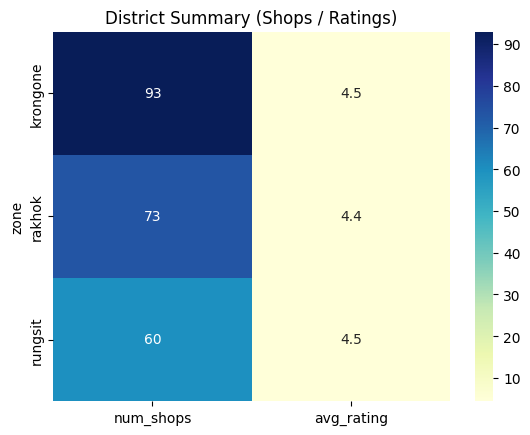

In [98]:
# Step 1: วิเคราะห์เชิงพื้นที่รวม
district_summary = df_main.groupby('zone').agg({
    'name': 'count',  # จำนวนร้านทั้งหมด
    'rating': 'mean', # ค่าเฉลี่ย rating ถ้ามี
}).rename(columns={'name': 'num_shops', 'rating': 'avg_rating'}).reset_index()

sns.heatmap(district_summary.set_index('zone'), annot=True, cmap='YlGnBu')
plt.title("District Summary (Shops / Ratings)")
plt.show()

เมื่อได้วิเคราะห์สเต็ปที่หนึ่งพบว่าคลองหนึ่งไม่ตอบโจทย์เพราะว่าในเรื่องของการเดินทางเพราะฉะนั้นจะเหลือตำบลรังสิตกับตำบลหลักหกแต่ทีนี้เรายังไม่เลือกแบบชัดเจนเรามาในสูตรของ Step สองก่อนก็คือวิเคราะห์ความหนาแน่นของคู่แข่ง

# Step 2: วิเคราะห์ความหนาแน่นของคู่แข่ง (Competitor Density)
เป้าหมาย: หาจุดที่ “มีน้อยร้าน” ภายในรัศมี 1 กม.

In [83]:
# แปลงพิกัดเป็น radians เพื่อใช้ metric='haversine'
coords_rad = np.deg2rad(df_main[['lat', 'long']].values)
tree = BallTree(coords_rad, metric='haversine')

# กำหนดรัศมี 1 กม. → r = 1/6371 (6371 = รัศมีโลกหน่วยกม.)
r = 1 / 6371  

# query_radius จะคืน array ของ counts (รวมตัวเองด้วย)
counts = tree.query_radius(coords_rad, r=r, count_only=True)

# สร้างคอลัมน์ใหม่ competitor_density = นับร้านรอบๆ (ไม่รวมตัวเอง)
df_main['competitor_density'] = counts - 1

# ดูสถิติสั้น ๆ
print(df_main['competitor_density'].describe())

count    226.000000
mean      23.017699
std       17.682374
min        0.000000
25%        7.000000
50%       22.000000
75%       36.000000
max       57.000000
Name: competitor_density, dtype: float64


In [107]:
import plotly.express as px

# กรองข้อมูลที่มีค่า lat, long, และ competitor_density ครบ
scatter_df = df_main[['lat', 'long', 'competitor_density']].dropna()

# สร้าง Scatter Mapbox Plot
fig = px.scatter_mapbox(scatter_df, 
                        lat='lat', 
                        lon='long', 
                        color='competitor_density',  # ใช้ competitor_density เป็นสี
                        size='competitor_density',  # ขนาดของจุดตาม competitor_density
                        color_continuous_scale='RdYlGn',  # สีแบบ Red-Yellow-Green
                        title='Step 2: Competitor Density Scatter Plot on Map',
                        labels={'long': 'Longitude', 'lat': 'Latitude'},
                        range_color=[scatter_df['competitor_density'].min(), scatter_df['competitor_density'].max()])

# ตั้งค่าพื้นหลังเป็นแผนที่
fig.update_layout(
    mapbox_style="carto-positron",  # เลือกประเภทแผนที่ (สามารถเปลี่ยนเป็น "open-street-map", "stamen-terrain", ฯลฯ)
    mapbox_zoom=10,  # ระดับการซูม
    mapbox_center={"lat": scatter_df['lat'].mean(), "lon": scatter_df['long'].mean()},  # ศูนย์กลางแผนที่
    width=1200,  # กำหนดความกว้าง
    height=800,  # กำหนดความสูง
    title_font=dict(size=24, color="darkblue"),  # ปรับขนาดและสีของ title
    coloraxis_colorbar=dict(title="Competitor Density (within 1 km)", 
                            tickvals=[scatter_df['competitor_density'].min(), scatter_df['competitor_density'].max()], 
                            ticktext=['Low', 'High']),  # ปรับสีของ color bar
)

# ปรับการกำหนดขอบจุดโดยใช้ 'marker' แทน
# fig.update_traces(marker=dict(
#     size=10,  # ขนาดของจุด
#     line=dict(width=2, color='DarkSlateGrey')  # ขอบของจุด
# ))

# แสดงกราฟ
fig.show()


C:\Users\eieiz\AppData\Local\Temp\ipykernel_9872\1559214241.py:7: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [85]:
import pandas as pd
import folium
from folium import plugins
zone_colors = {
    'rungsit': 'red',
    'rakhok': 'blue',
    'krongone': 'green'
}
center_lat = 13.9731
center_long = 100.5892

m = folium.Map(location=[center_lat, center_long], zoom_start=14, tiles='OpenStreetMap')

for idx, row in df_main.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=(row['weighted_rating'] - 4.0) * 20,  
        color=zone_colors[row['zone']],
        fill=True,
        fill_color=zone_colors[row['zone']],
        fill_opacity=0.7,
        popup=f"{row['name']}<br>\
            W_Rating: {row['weighted_rating']}<br>\
            n_comment: {row['comment']}<br>\
                Zone: {row['zone']}"
    ).add_to(m)

folium.LayerControl().add_to(m)
m


จากกราฟฮิต map ถ้าเป็นสีเขียวเข้มเข้มแสดงว่าร้านร้านนั้นโดยรอบๆร้านของร้านนั้นมีคู่แข่งที่ค่อนข้างจะเยอะถ้าเราสังเกตจากกราฟมันจะไปกระจกอยู่ที่ตำบลหลักหกเพราะฉะนั้นในบริเวณจุดเอเราไม่ควรลงไปสร้างคาเฟ่ตรงนี้เพราะว่าคู่แข่งค่อนข้างจะเยอะเพราะฉะนั้นเราควรมาสนใจในตำบลรังสิตแทน

# Step 3: วิเคราะห์ระยะห่างจาก Cafe Amazon
เป้าหมาย: หลีกเลี่ยงการปะทะกับแบรนด์แข็ง

In [87]:
zone_colors = {
    'rungsit': 'red',
    'rakhok': 'blue',
    'krongone': 'green'
}

center_lat = 13.9731
center_long = 100.5892

m = folium.Map(location=[center_lat, center_long], zoom_start=14, tiles='OpenStreetMap')

for idx, row in df_main.iterrows():
    # Check if the store is Amazon
    if row['amazon'] == 1:
        color = 'yellow'
    else:
        color = zone_colors.get(row['zone'], 'gray')  # Default to gray if the zone is not in the dictionary
    
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=(row['weighted_rating'] - 4.0) * 20,  
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"{row['name']}<br>\
            W_Rating: {row['weighted_rating']}<br>\
            n_comment: {row['comment']}<br>\
            Zone: {row['zone']}"
    ).add_to(m)

folium.LayerControl().add_to(m)
m

ไม่ควรใกล้ Amazon

# Step 4: วิเคราะห์ความใกล้มหาวิทยาลัย
เป้าหมาย: หาความสัมพันธ์ว่าคาเฟ่มีแนวโน้มตั้งใกล้มหาวิทยาลัยไหม

In [88]:
import pandas as pd
import folium
from folium import plugins

# โซนสี
zone_colors = {
    'rungsit': 'red',
    'rakhok': 'blue',
    'krongone': 'green'
}

# ตำแหน่งกลางของแผนที่
center_lat = 13.9731
center_long = 100.5892

# สร้างแผนที่
m = folium.Map(location=[center_lat, center_long], zoom_start=14, tiles='OpenStreetMap')

# วาด marker ร้านอาหาร
for idx, row in df_main.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=(row['weighted_rating'] - 4.0) * 20,  
        color=zone_colors[row['zone']],
        fill=True,
        fill_color=zone_colors[row['zone']],
        fill_opacity=0.7,
        popup=f"{row['name']}<br>\
            W_Rating: {row['weighted_rating']}<br>\
            n_comment: {row['comment']}<br>\
            Zone: {row['zone']}"
    ).add_to(m)

# ข้อมูลมหาวิทยาลัย: (ชื่อ, lat, long)
universities = [
    ("RMUTT", 13.9734028,100.6136685),
    ("North Bangkok", 13.9975329,100.6712262),
    ("Bangkok University", 14.0395107,100.6127897),
    ("Thammasat (TU)", 14.0722696,100.6056305),
    ("RSU ", 13.9670095, 100.582841)
]

# วาดหมุดและวงกลมรัศมีรอบมหาวิทยาลัย
for name, lat, lon in universities:
    # ปักหมุดมหาวิทยาลัย
    folium.Marker(
        location=[lat, lon],
        popup=f"{name} University",
        icon=folium.Icon(color='purple', icon='university', prefix='fa')
    ).add_to(m)

    # วงกลมรอบมหาวิทยาลัย 1 km
    folium.Circle(
        location=[lat, lon],
        radius=1000,  # 1 km
        color='purple',
        fill=False,
        dash_array='5, 10',
        popup=f"1 km radius from {name}"
    ).add_to(m)

# เพิ่ม layer control
folium.LayerControl().add_to(m)

# แสดงแผนที่
m


In [91]:
df_rakhok = df_main[df_main['zone'] == 'rungsit']

In [ ]:
#ค่อยมาเปลี่ยน ฟิวเจอร์ปาค ดู rating , จำนวนคนที่เข้ามา comment , 

In [108]:
df_rakhok[['weighted_rating','distance_rsu']].corr()

,weighted_rating,distance_rsu
weighted_rating,1.000000,0.025396
distance_rsu,0.025396,1.000000


Text(0, 0.5, 'weighted_rating')

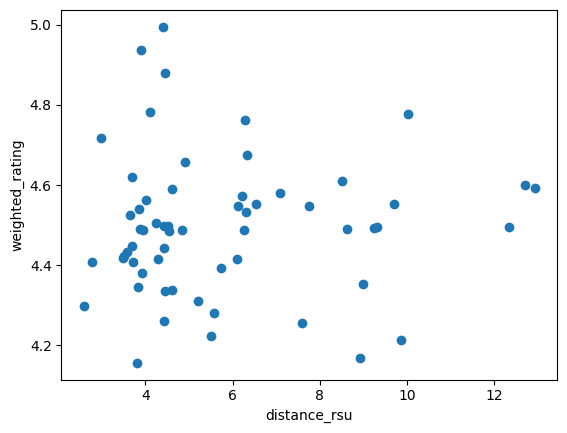

In [92]:
plt.scatter(y='weighted_rating',x='distance_rsu',data=df_rakhok[['weighted_rating','distance_rsu']])
plt.xlabel('distance_rsu')
plt.ylabel('weighted_rating')

ห้างติดกัน เพราะฉะนั้น เราควรสร้าง บริเวณนี้ๆ มีหอหัก โรงพยาบาล ทางผ่าน คนอาศัยเยอะ จาก สิถิติ